# Latar Belakang

Sebuah perusahaan yang bergerak di bidang penyewaan properti, ingin memahami faktor-faktor yang mempengaruhi tingkat okupansi dan jumlah ulasan dari listing mereka di Bangkok. Perusahaan ini melakukan analisis data untuk mengidentifikasi karakteristik listing yang sukses.

# Pernyataan Masalah

Perusahaan ingin mengetahui **karakteristik listing yang memiliki tingkat okupansi tinggi atau mendapatkan ulasan lebih banyak**. Informasi ini akan membantu perusahaan dalam mengoptimalkan strategi pemasaran dan pengelolaan listing mereka.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik listing yang memiliki tingkat okupansi tinggi atau menerima lebih banyak ulasan, terutama dibandingkan dengan listing yang memiliki okupansi rendah atau ulasan sedikit?**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Data

**Untuk menjawab pertanyaan di atas, kita akan menganalisa data Listing Aribnb. Dataset ini berisi informasi terkait Listing Airbnb di Bangkok. Ada 15 kolom di dalam dataset Airbnb Listing Bangkok, yaitu:**

- id : Airbnb's unique identifier for the listing.
- name : Name of the listing.
- host_id : Airbnb's unique identifier for the host/user.
- host_name : Name of the host. Usually, just the first name(s).
- neighborhood : The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
- latitude : Uses the World Geodetic System (WGS84) projection for latitude and longitude.
- longitude : Uses the World Geodetic System (WGS84) projection for latitude and longitude.
- room_type : [Entire home/apt |Private room| Shared room| Hotel]

   All homes are grouped into the following three room types:

   - Entire place:
      Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies the first floor of the home") and provide further details on the listing.

   - Private rooms:
      Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

   - Shared rooms:
      Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays.

- price : Daily price in local currency. Note, the $ sign may be used despite the locale.
- minimum_nights : The minimum number of night stays for the listing (calendar rules may differ).
- number_of_reviews : The number of reviews the listing has.
- last_review : The date of the last/newest review.
- calculated_host_listings_count : The number of listings the host has in the current scrape in the city/region geography.
- availability_365 : avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host.
- number_of_reviews_ltm : The number of reviews the listing has (in the last 12 months).

Berikut 5 baris teratas dan terbawah dari dataset Airbnb Listings Bangkok.

In [2]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Airbnb Listing Bangkok.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [4]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [5]:
pd.set_option('display.max_colwidth', 0)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

In [6]:
df.dtypes

Unnamed: 0                        int64  
id                                int64  
name                              object 
host_id                           int64  
host_name                         object 
neighbourhood                     object 
latitude                          float64
longitude                         float64
room_type                         object 
price                             int64  
minimum_nights                    int64  
number_of_reviews                 int64  
last_review                       object 
reviews_per_month                 float64
calculated_host_listings_count    int64  
availability_365                  int64  
number_of_reviews_ltm             int64  
dtype: object

Secara umum, kita bisa melihat bahwa:

* dataset Airbnb Listings Bangkok memiliki 17 kolom dan 15854 baris
* beberapa kolom, yaitu, `name`, `host_name`, `last_review`, `reviews_per_month` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `Unnamed: 0 ` berisikan id unik untuk tiap listings, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `last_review` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan data tanggal. Mari kita cek lebih detil.
* kolom `training_hours` memiliki range data yang cukup besar, dari 1-336. Dengan asumsi training dilakukam full time - 8 jam sehari, maka butuh waktu 42 hari untuk mencapai 336 hari. Angka ini masih cukup masuk akal, sehingga tidak perlu dilakukan apa-aoa terhadap kolom ini.

## Missing Value

In [7]:
# Jumlah Missing Value dalam dataset

df.isna().sum()

Unnamed: 0                        0   
id                                0   
name                              8   
host_id                           0   
host_name                         1   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [8]:
# persentase Missing Value di tiap kolom

df.isna().sum()/df.shape[0]*100

Unnamed: 0                        0.000000 
id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.006308 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

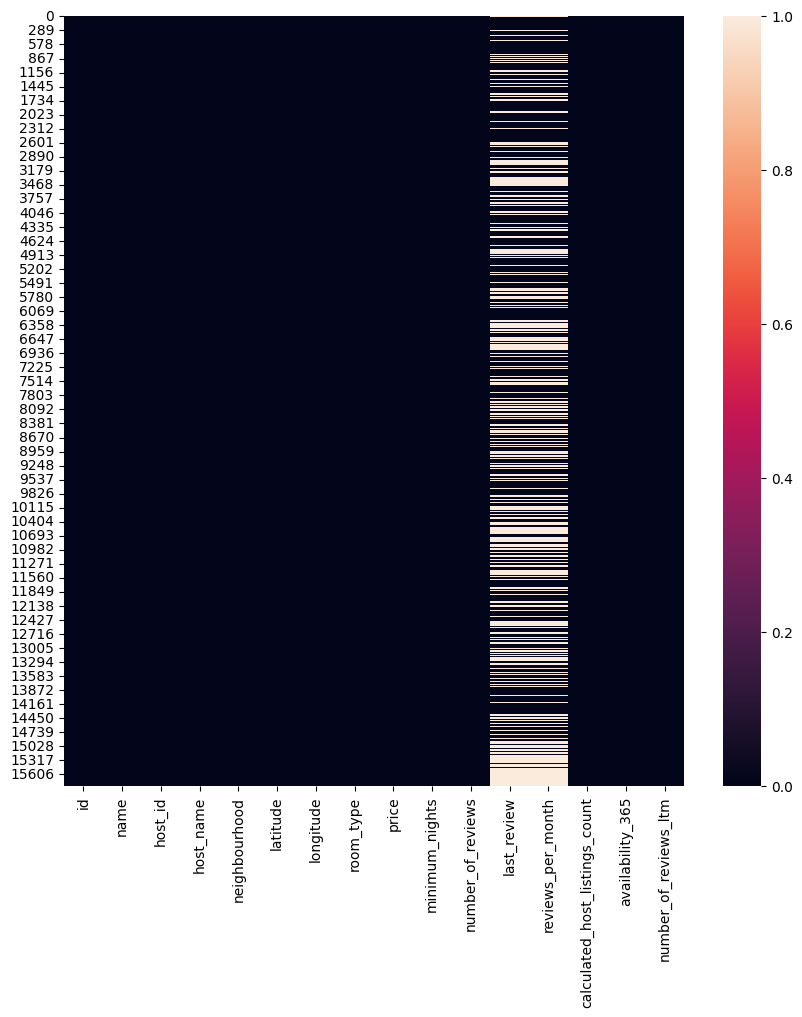

In [9]:
# Sebaran Missing Value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['id','name','host_id','host_name','neighbourhood','latitude','longitude','room_type', 'price', 'minimum_nights', 
                'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].isna())

In [10]:
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with any missing values:\n", rows_with_missing)

Rows with any missing values:
        Unnamed: 0                  id  \
1      1           27979                
2      2           28745                
4      4           941865               
7      7           1738669              
14     14          959254               
...    ..             ...               
15849  15849       790465040741092826   
15850  15850       790474503157243541   
15851  15851       790475335086864240   
15852  15852       790475546213717328   
15853  15853       790476492384199044   

                                                     name    host_id  \
1      Easy going landlord,easy place                      120541      
2      modern-style apartment in Bangkok                   123784      
4      Suite Room 3 at MetroPoint                          610315      
7      1 chic bedroom apartment in BKK                     7045870     
14     Deluxe Condo, Nana, Pool/GYM/Sauna                  5153476     
...                                   ...   

In [11]:
columns_with_missing = df.columns[df.isnull().any()].tolist()
print("Columns with any missing values:", columns_with_missing)

Columns with any missing values: ['name', 'host_name', 'last_review', 'reviews_per_month']


Secara garis besar:
* *missing value* di kolom `name`, `host_name` memiliki proporsi yang rendah yaitu dibawah 1% 
* *missing value* di kolom `last_review`, `reviews_per_month` memiliki proporsi yang cukup tinggi yaitu 36%
* *missing value* di kolom `last_review` dan `reviews_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_review` kosong, maka kemungkinan besar data di `reviews_per_month` juga kosong.  

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus ini, karena jumlah missing value yang tergolong cukup tinggi (sampai 36%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan data asli dari website. Untuk data kosong yang bernilai 0 seperti pada kolom `last_review` dan `reviews_per_month` akan diisi dengan angka 0. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

In [12]:
print(df[df['name'].isnull()])

      Unnamed: 0        id name   host_id        host_name neighbourhood  \
439   439         4549768   NaN  18852579  Titawan          Phra Khanong   
544   544         4720818   NaN  24386225  Cherry           Din Daeng      
572   572         4245018   NaN  22030043  Parichart        Bang Phlat     
669   669         6148415   NaN  31895202  Chira            Bang Na        
1030  1030        8055144   NaN  42521288  Nantida          Vadhana        
1282  1282        10000742  NaN  51374914  Diamond Bangkok  Ratchathewi    
1594  1594        10710165  NaN  55347997  Khaneungnit      Vadhana        
2075  2075        13142743  NaN  73275200  Pakaphol         Khlong Toei    

      latitude  longitude        room_type  price  minimum_nights  \
439   13.69406  100.59619  Private room     1080   5                
544   13.77562  100.57346  Private room     1200   1                
572   13.78376  100.49821  Private room     1200   1                
669   13.68276  100.60894  Entire home/

berdasarkan *domain knowledge* yang didapatkan dari website, kita akan mencoba mengisi data kosong pada kolom `name` dengan pendekatan berikut:
* **mengisi missing values pada kolom `name` dengan *No Description* untuk listing yang memang tidak memiliki data nama listing.
* **mengisi missing values pada kolom `name` dengan nama listings yang sebenarnya untuk listing yang memiliki data pada website.

Pengisian data dengan pendekatan ini diharapkan tidak mengganggu distribusi data yang ada.

In [13]:
# Mengecek data untuk melihat jika host tersebut memiliki listing lainnya

df[df['host_id'] == 18852579]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0


In [14]:
# Mengecek data untuk melihat jika host tersebut memiliki listing lainnya

df[df['host_id'] == 24386225]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0


In [15]:
# Mengecek data untuk melihat jika host tersebut memiliki listing lainnya

df[df['host_id'] == 22030043]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0


In [16]:
# Mengecek data untuk melihat jika host tersebut memiliki listing lainnya

df[df['host_id'] == 31895202]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0


In [17]:
# Mengecek data untuk melihat jika host tersebut memiliki listing lainnya

df[df['host_id'] == 42521288]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0


In [18]:
# Mengecek data untuk melihat jika host tersebut memiliki listing lainnya

df[df['host_id'] == 51374914]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0


In [19]:
# Mengecek data untuk melihat jika host tersebut memiliki listing lainnya

df[df['host_id'] == 55347997]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0


In [20]:
# Mengecek data untuk melihat jika host tersebut memiliki listing lainnya

df[df['host_id'] == 73275200]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


`host_id` dengan ID *73275200* ternyata memiliki 3 listings dengan nama yang sama namun listings ke 3 merupakan missing value. Untuk itu, missing values pada data diatas akan diisi dengan nama listing yang dimiliki oleh `host_id` dengan ID *73275200* yaitu 'Errday Guest House'

In [21]:
df.loc[df['id'] == 13142743, 'name'] = 'Errday Guest House'

In [22]:
# Memastikan missing values telah terisi

df[df['host_id'] == 73275200]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [23]:
# Memastikan missing values pada kolom `name` tersisa 7

print(df[df['name'].isnull()])

      Unnamed: 0        id name   host_id        host_name neighbourhood  \
439   439         4549768   NaN  18852579  Titawan          Phra Khanong   
544   544         4720818   NaN  24386225  Cherry           Din Daeng      
572   572         4245018   NaN  22030043  Parichart        Bang Phlat     
669   669         6148415   NaN  31895202  Chira            Bang Na        
1030  1030        8055144   NaN  42521288  Nantida          Vadhana        
1282  1282        10000742  NaN  51374914  Diamond Bangkok  Ratchathewi    
1594  1594        10710165  NaN  55347997  Khaneungnit      Vadhana        

      latitude  longitude        room_type  price  minimum_nights  \
439   13.69406  100.59619  Private room     1080   5                
544   13.77562  100.57346  Private room     1200   1                
572   13.78376  100.49821  Private room     1200   1                
669   13.68276  100.60894  Entire home/apt  2424   2                
1030  13.74126  100.55761  Private room     50

In [24]:
# Mengisi missing values yang tersisa menjadi 'No Description'

df['name'] = df['name'].fillna('No Description')

In [25]:
# Memastikan missing values pada kolom `name` telah terisi

print(df[df['name'].isnull()])

Empty DataFrame
Columns: [Unnamed: 0, id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []


In [26]:
df.isnull().sum()

Unnamed: 0                        0   
id                                0   
name                              0   
host_id                           0   
host_name                         1   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [27]:
print(df[df['host_name'].isnull()])

      Unnamed: 0        id           name    host_id host_name neighbourhood  \
3571  3571        19682464  Cozy Hideaway  137488762  NaN       Bang Kapi      

      latitude  longitude     room_type  price  minimum_nights  \
3571  13.76999  100.63769  Private room  1399   3                

      number_of_reviews last_review  reviews_per_month  \
3571  1                  2017-07-29  0.02                

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
3571  1                               365               0                      


In [28]:
# Mengisi missing values menjadi 'No Description'

df['host_name'] = df['host_name'].fillna('No Description')

In [29]:
# Memastikan missing values pada kolom `host_name` telah terisi

print(df[df['host_name'].isnull()])

Empty DataFrame
Columns: [Unnamed: 0, id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []


In [30]:
df.isnull().sum()

Unnamed: 0                        0   
id                                0   
name                              0   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [31]:
print(df[(df['last_review'].isnull()) & (df['number_of_reviews'] == 0)])

       Unnamed: 0                  id  \
1      1           27979                
2      2           28745                
4      4           941865               
7      7           1738669              
14     14          959254               
...    ..             ...               
15849  15849       790465040741092826   
15850  15850       790474503157243541   
15851  15851       790475335086864240   
15852  15852       790475546213717328   
15853  15853       790476492384199044   

                                                     name    host_id  \
1      Easy going landlord,easy place                      120541      
2      modern-style apartment in Bangkok                   123784      
4      Suite Room 3 at MetroPoint                          610315      
7      1 chic bedroom apartment in BKK                     7045870     
14     Deluxe Condo, Nana, Pool/GYM/Sauna                  5153476     
...                                   ...                      ...     
158

In [32]:
# Mengisi missing values pada kolom `last_review` dengan angka 0

df['last_review'] = df['last_review'].fillna(0)

In [33]:
df.isnull().sum()

Unnamed: 0                        0   
id                                0   
name                              0   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       0   
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [34]:
print(df[(df['reviews_per_month'].isnull()) & (df['number_of_reviews'] == 0)])

       Unnamed: 0                  id  \
1      1           27979                
2      2           28745                
4      4           941865               
7      7           1738669              
14     14          959254               
...    ..             ...               
15849  15849       790465040741092826   
15850  15850       790474503157243541   
15851  15851       790475335086864240   
15852  15852       790475546213717328   
15853  15853       790476492384199044   

                                                     name    host_id  \
1      Easy going landlord,easy place                      120541      
2      modern-style apartment in Bangkok                   123784      
4      Suite Room 3 at MetroPoint                          610315      
7      1 chic bedroom apartment in BKK                     7045870     
14     Deluxe Condo, Nana, Pool/GYM/Sauna                  5153476     
...                                   ...                      ...     
158

In [35]:
# Mengisi missing values pada kolom `reviews_per_month` dengan angka 0

df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

In [36]:
df.isnull().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [37]:
df.dtypes

Unnamed: 0                        int64  
id                                int64  
name                              object 
host_id                           int64  
host_name                         object 
neighbourhood                     object 
latitude                          float64
longitude                         float64
room_type                         object 
price                             int64  
minimum_nights                    int64  
number_of_reviews                 int64  
last_review                       object 
reviews_per_month                 float64
calculated_host_listings_count    int64  
availability_365                  int64  
number_of_reviews_ltm             int64  
dtype: object

melihat nilai duplikat

In [38]:
df.duplicated().sum()

0

Dari pengecekan diatas, nilai duplikat adala 0. Namun bisa jadi tidak ada nilai duplikat disebabkan oleh adanya kolom `Unnamed: 0`. Maka kita akan menghapus kolom tersebut.

In [39]:
# Drop Unnamed: 0 to see duplicate values

df.drop(columns=['Unnamed: 0'], inplace=True)

In [40]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0,0.00,3,365,0


In [41]:
# Memastikan kembali nilai duplikat

df.duplicated().value_counts()

False    15854
Name: count, dtype: int64

In [42]:
# Melihat anomali pada dataset

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.516178,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.952753,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [43]:
# Melihat harga yang bernilai 0

df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0,0.0,1,0,0


In [44]:
# Menghapus kolom dengan harga 0

df = df[df['price'] != 0]

In [45]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585300e+04,1.585300e+04,15853.000000,15853.000000,1.585300e+04,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000
mean,1.579496e+17,1.540928e+08,13.745144,100.559903,3.217907e+03,15.293257,16.655207,0.516211,13.890431,244.394058,3.481738
std,2.946082e+17,1.318666e+08,0.043041,0.050912,2.497290e+04,50.816496,40.614397,0.952774,30.270630,125.832224,8.917176
min,2.793400e+04,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503224e+07,1.224556e+08,13.738490,100.561410,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256284e+07,2.390274e+08,13.759500,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [46]:
# Melihat harga diatas 1000000

df[df['price'] > 1000000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,Jj,Vadhana,13.746660,100.559100,Entire home/apt,1014758,30,2,2022-09-17,0.32,10,75,2
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,0,0.00,1,365,0


In [47]:
# Mengganti harga yang benar sesuai pada website
df.loc[df['id'] == 562972065309061724, 'price'] = 3146

In [48]:
df[df['price'] > 1000000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,0,0.0,1,365,0


In [49]:
# Menghapus data yang masih memiliki harga diatas 1000000

df = df[df['price'] != 1100000]

In [50]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585200e+04,1.585200e+04,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000
mean,1.579195e+17,1.541017e+08,13.745144,100.559903,3084.901968,15.293338,16.656258,0.516243,13.891244,244.386450,3.481958
std,2.945930e+17,1.318660e+08,0.043042,0.050914,21982.387252,50.818098,40.615462,0.952795,30.271412,125.832546,8.917414
min,2.793400e+04,5.892000e+04,13.527300,100.329550,278.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720087,100.529685,900.000000,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503214e+07,1.224556e+08,13.738490,100.561415,1429.000000,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.255894e+07,2.390365e+08,13.759505,100.585150,2429.000000,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1000000.000000,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [51]:
# Melihat data yang memiliki harga 1000000

df[df['price'] >= 1000000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.75995,100.56936,Entire home/apt,1000000,100,45,2016-09-05,0.51,4,180,0
1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.75471,100.56598,Entire home/apt,1000000,100,53,2018-02-20,0.64,4,249,0
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.76065,100.56898,Entire home/apt,1000000,1,12,2020-03-24,0.22,4,336,0
6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,Cora,Khlong Toei,13.70333,100.59247,Entire home/apt,1000000,2,69,2020-03-12,1.39,6,90,0
9345,39858231,1BR cozy condo close to ONNUT BTS.,210559448,Cora,Khlong Toei,13.70496,100.59151,Entire home/apt,1000000,25,2,2020-02-23,0.05,6,88,0


In [52]:
# Menghapus data yang masih memiliki harga 1000000

df = df[df['price'] != 1000000]

In [53]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.584700e+04,1.584700e+04,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000
mean,1.579693e+17,1.541179e+08,13.745147,100.559897,2770.358175,15.283776,16.650091,0.516229,13.894112,244.404051,3.483057
std,2.946261e+17,1.318743e+08,0.043046,0.050920,13026.343905,50.816909,40.617907,0.952910,30.275751,125.837138,8.918606
min,2.793400e+04,5.892000e+04,13.527300,100.329550,278.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529660,900.000000,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.504244e+07,1.224556e+08,13.738490,100.561400,1429.000000,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256919e+07,2.390815e+08,13.759495,100.585150,2429.000000,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,710760.000000,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [94]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,occupancy_rate,high_performance,stay_type
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,0.032877,True,Short-Term
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0,0.019178,False,Short-Term
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0,0.000000,False,Long-Term
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,0.115068,False,Short-Term
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0,0.000000,False,Short-Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0,0.008219,False,Long-Term
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0,0.000000,False,Short-Term
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0,0.000000,False,Short-Term
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0,0.000000,False,Short-Term


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [93]:
# df.to_csv("Airbnb_Cleaned.csv", index=False)

In [55]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15847, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15847,"[33365113, 45146411]"
1,name,object,0,14788,"[Artist's House & Gallery-2 Adjoining Guest Suites, Paragon city center siam 1Br]"
2,host_id,int64,0,6657,"[171429817, 19177497]"
3,host_name,object,0,5311,"[Chayakorn, Sarun]"
4,neighbourhood,object,0,50,"[Suanluang, Vadhana]"
5,latitude,float64,0,9604,"[13.76901, 13.74122]"
6,longitude,float64,0,10223,"[100.5845, 100.6376]"
7,room_type,object,0,4,"[Private room, Shared room]"
8,price,int64,0,3037,"[1586, 3430]"
9,minimum_nights,int64,0,86,"[90, 13]"


# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik listing yang memiliki tingkat okupansi tinggi atau menerima lebih banyak ulasan, terutama dibandingkan dengan listing yang memiliki okupansi rendah atau ulasan sedikit**.

In [58]:
df['price'].describe()

count    15847.000000 
mean     2770.358175  
std      13026.343905 
min      278.000000   
25%      900.000000   
50%      1429.000000  
75%      2429.000000  
max      710760.000000
Name: price, dtype: float64

In [59]:
df['occupancy_rate'] = 1 - (df['availability_365'] / 365)

Melihat distribusi data pada `occupancy_rate`

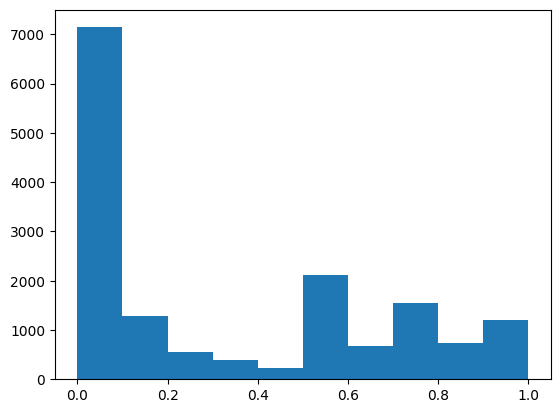

In [60]:
plt.hist(df['occupancy_rate'])
plt.show()

Melihat distribusi data pada `number_of_reviews`

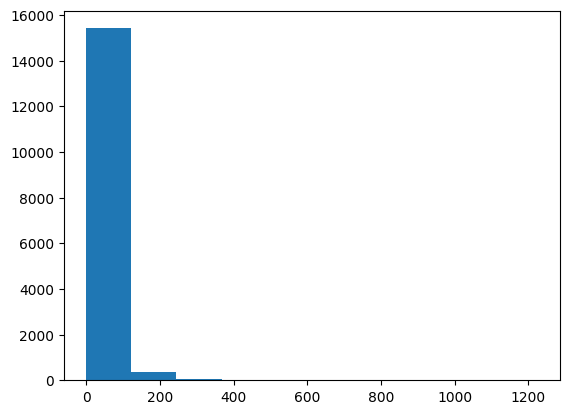

In [61]:
plt.hist(df['number_of_reviews'])
plt.show()

Berdasarkan karakteristik grafik distribusi data dari `occupancy_rate` dan `number_of_reviews`, maka dapat dinyatakan bahwa distribusi data tidak normal.

In [62]:
# Definisikan listing berkinerja tinggi
occupancy_median = df['occupancy_rate'].median()
reviews_median = df['number_of_reviews'].median()
df['high_performance'] = ((df['occupancy_rate'] > occupancy_median) | 
                          (df['number_of_reviews'] > reviews_median))

In [63]:
# Separate high performance and low performance
high = df[df['high_performance']]
low= df[~df['high_performance']]

## 1. Menganalisa berdasarkan Harga (`price`)

1. Analisis Harga:
                         mean  median
high_performance                     
False             3394.887887  1496.0
True              2492.542670  1400.0


Text(0.5, 1.0, 'Distribusi Harga berdasarkan Performa Listing')

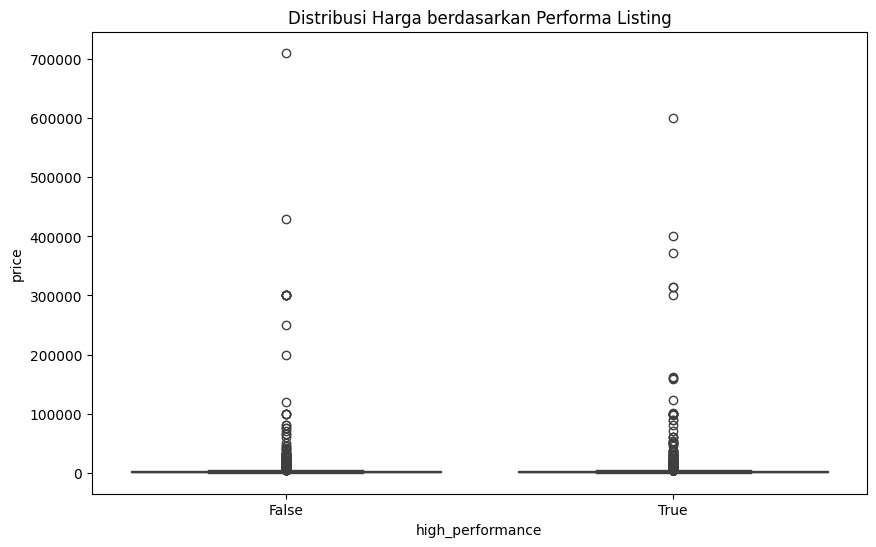

In [65]:
# 1. Analisis Harga
print("1. Analisis Harga:")
print(df.groupby('high_performance')['price'].agg(['mean', 'median']))

# Visualisasi distribusi harga
plt.figure(figsize=(10,6))
sns.boxplot(x='high_performance', y='price', data=df)
plt.title('Distribusi Harga berdasarkan Performa Listing')

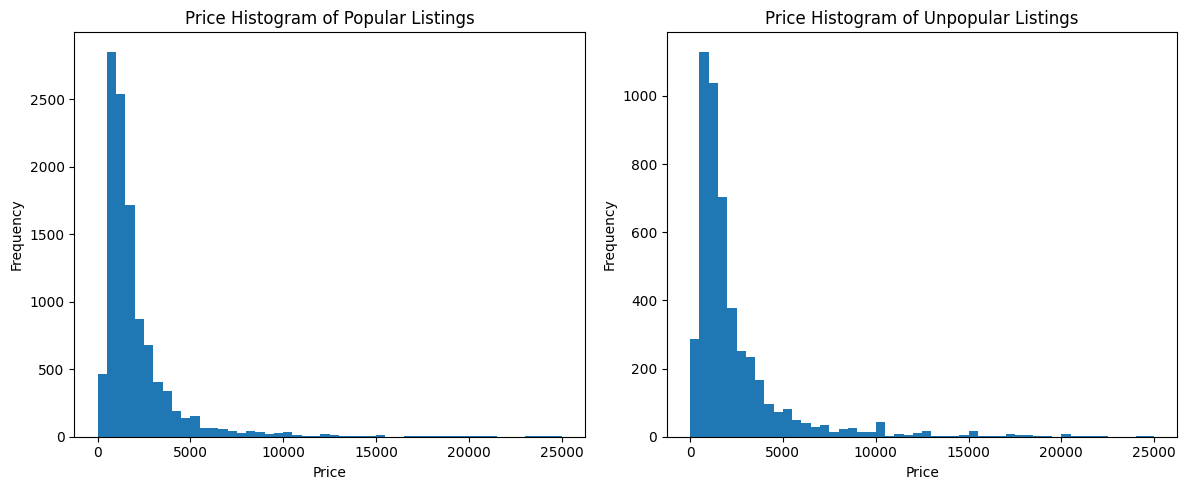

In [66]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.hist(high['price'], bins=50, range=(0, 25000))
plt.title('Price Histogram of Popular Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(low['price'], bins=50, range=(0, 25000))
plt.title('Price Histogram of Unpopular Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Insight Analisis Harga:

- Terdapat perbedaan signifikan antara harga listing berkinerja tinggi dan rendah.
- Listing dengan harga menengah cenderung memiliki kinerja lebih baik.

## 2. Menganalisa berdasarkan Tipe Kamar (`room_type`)

In [67]:
# 2. Analisis Tipe Kamar
print("\n2. Analisis Tipe Kamar:")
room_type_perf = df.groupby(['high_performance', 'room_type']).size().unstack(fill_value=0)
room_type_perf_pct = room_type_perf.div(room_type_perf.sum(axis=1), axis=0)

print("Proporsi tipe kamar pada listing:")
print(room_type_perf_pct)


2. Analisis Tipe Kamar:
Proporsi tipe kamar pada listing:
room_type         Entire home/apt  Hotel room  Private room  Shared room
high_performance                                                        
False             0.392908         0.043656    0.518549      0.044886   
True              0.637217         0.039661    0.295405      0.027717   


In [68]:
room_type_counts = df['room_type'].value_counts()
print("Jumlah listing berdasarkan tipe kamar:")
print(room_type_counts)

Jumlah listing berdasarkan tipe kamar:
room_type
Entire home/apt    8906
Private room       5770
Hotel room         648 
Shared room        523 
Name: count, dtype: int64


In [69]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['room_type'], df['high_performance'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p_value:.4f}")

Chi-square p-value: 0.0000


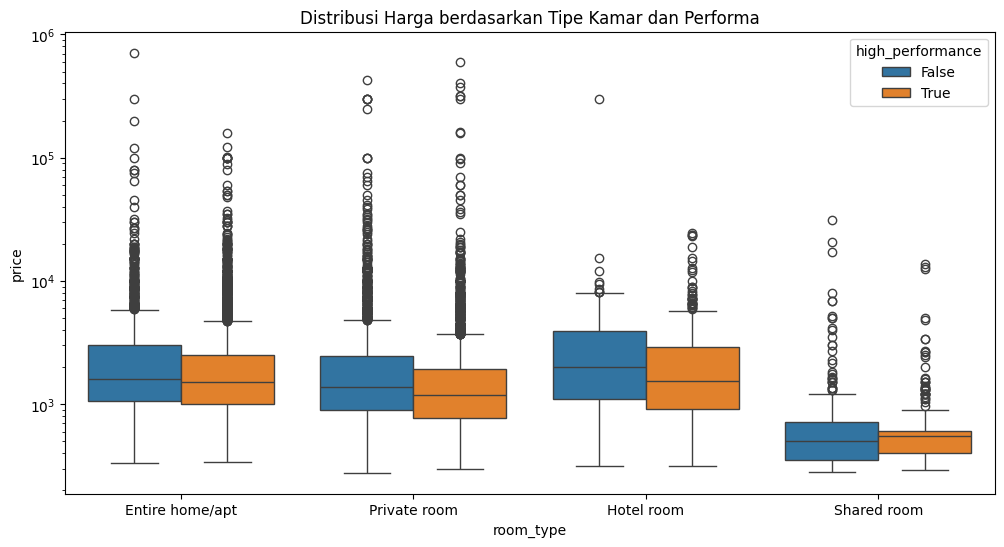

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(x='room_type', y='price', hue='high_performance', data=df)
plt.yscale('log')
plt.title('Distribusi Harga berdasarkan Tipe Kamar dan Performa')
plt.show()

high_performance     False      True
room_type                           
Entire home/apt   0.215248  0.784752
Hotel room        0.328704  0.671296
Private room      0.438475  0.561525
Shared room       0.418738  0.581262


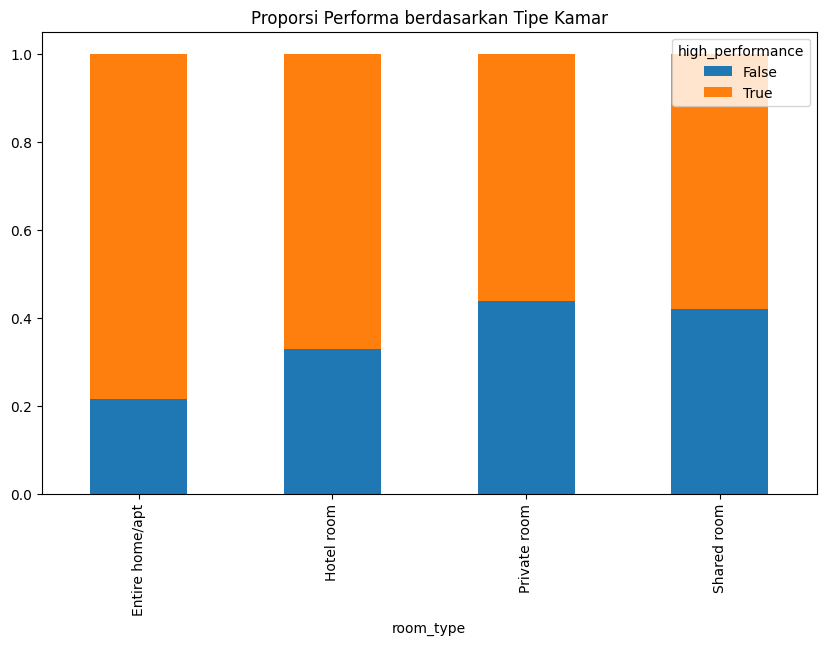

In [71]:
room_type_perf = pd.crosstab(df['room_type'], df['high_performance'], normalize='index')
print(room_type_perf)

# Visualisasi
room_type_perf.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Proporsi Performa berdasarkan Tipe Kamar')
plt.show()

<Figure size 1200x600 with 0 Axes>

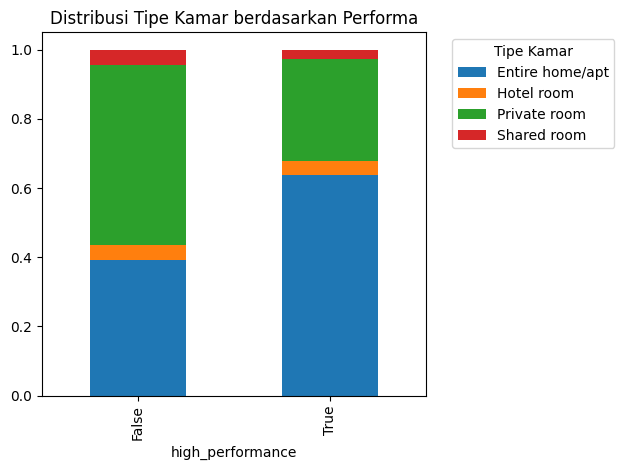

In [96]:
plt.figure(figsize=(12,6))
room_type_perf_pct.plot(kind='bar', stacked=True)
plt.title('Distribusi Tipe Kamar berdasarkan Performa')
plt.legend(title='Tipe Kamar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Insight Tipe Kamar:

- Tipe kamar tertentu (misalnya "Entire home/apt") mungkin memiliki proporsi performa tinggi yang lebih besar.
- Ada korelasi antara tipe kamar dan harga yang mempengaruhi performa.
- Terdapat perbedaan performa antara listing jangka pendek dan jangka panjang.
- Harga dan tingkat okupansi berbeda antara kedua jenis listing ini.

## 3. Menganalisa berdasarkan Lingkungan (`neighbourhood`)

In [73]:
# 3. Analisis Lingkungan
print("\n3. Analisis Lingkungan:")
neighborhood_perf = df.groupby(['neighbourhood', 'high_performance']).size().unstack(fill_value=0)
neighborhood_perf_pct = neighborhood_perf.div(neighborhood_perf.sum(axis=1), axis=0)
top_neighborhoods = neighborhood_perf_pct.nlargest(10, True)

print("10 lingkungan teratas dengan proporsi listing berkinerja tinggi:")
print(top_neighborhoods)


3. Analisis Lingkungan:
10 lingkungan teratas dengan proporsi listing berkinerja tinggi:
high_performance     False      True
neighbourhood                       
Khlong Toei       0.222912  0.777088
Phaya Thai        0.244076  0.755924
Huai Khwang       0.245989  0.754011
Sathon            0.249691  0.750309
Bang Sue          0.260000  0.740000
Samphanthawong    0.263158  0.736842
Phra Khanong      0.274194  0.725806
Vadhana           0.279405  0.720595
Ratchathewi       0.292639  0.707361
Bang Rak          0.295042  0.704958


<Figure size 1200x600 with 0 Axes>

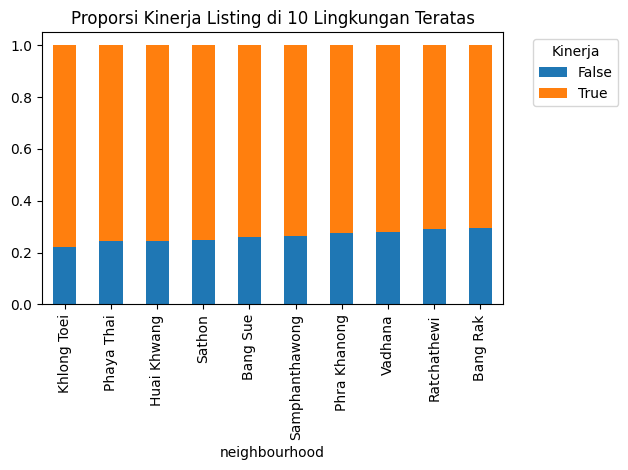

In [74]:
plt.figure(figsize=(12,6))
top_neighborhoods.plot(kind='bar', stacked=True)
plt.title('Proporsi Kinerja Listing di 10 Lingkungan Teratas')
plt.legend(title='Kinerja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Analisis Proporsi Performa berdasarkan Neighbourhood:

10 Neighbourhood dengan Proporsi Performa Tinggi Tertinggi:
neighbourhood
Khlong Toei       0.777088
Phaya Thai        0.755924
Huai Khwang       0.754011
Sathon            0.750309
Bang Sue          0.740000
Samphanthawong    0.736842
Phra Khanong      0.725806
Vadhana           0.720595
Ratchathewi       0.707361
Bang Rak          0.704958
Name: high_performance, dtype: float64

10 Neighbourhood dengan Proporsi Performa Tinggi Terendah:
neighbourhood
Lat Phrao        0.491228
Thung khru       0.478261
Sai Mai          0.475000
Khlong Sam Wa    0.468750
Saphan Sung      0.444444
Nong Khaem       0.444444
Min Buri         0.419355
Bang Khae        0.369565
Dusit            0.329670
Bang Bon         0.000000
Name: high_performance, dtype: float64


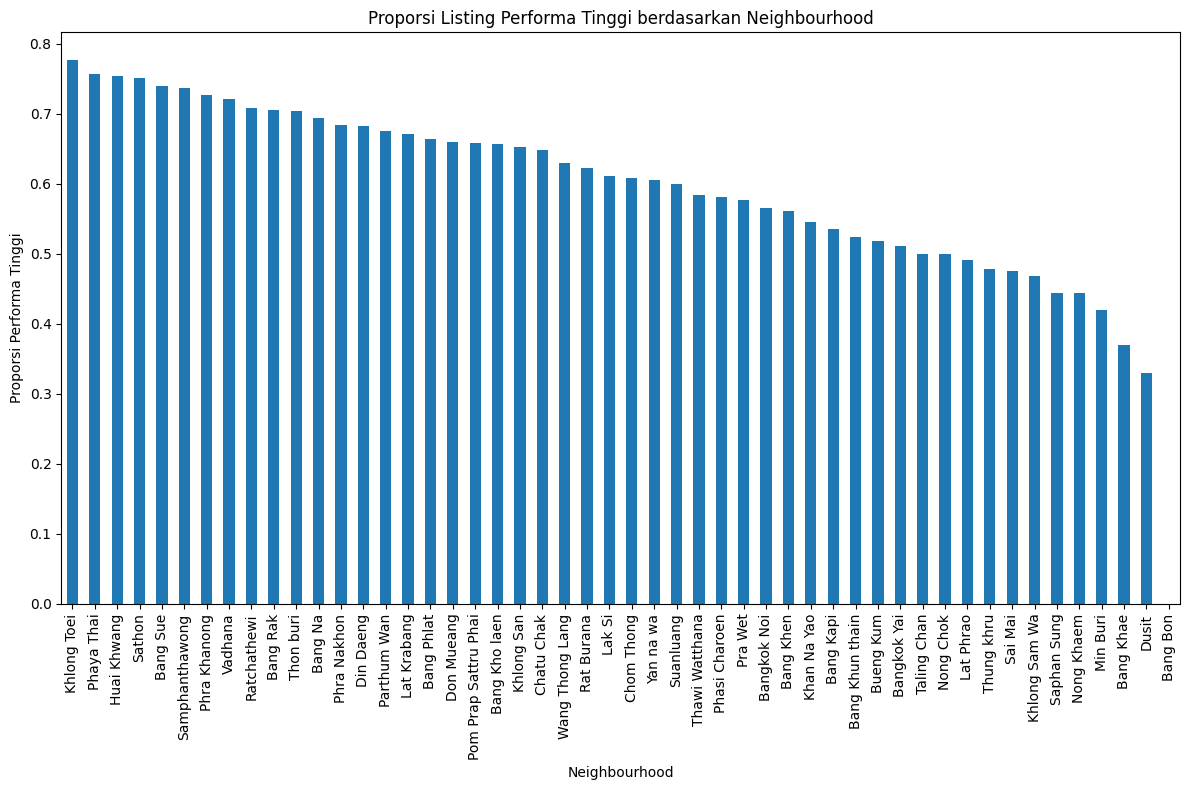

In [75]:
# Hitung proporsi performa tinggi untuk setiap neighbourhood
neighbourhood_perf = df.groupby('neighbourhood')['high_performance'].mean().sort_values(ascending=False)

# Tampilkan 10 neighbourhood teratas dan terbawah
print("10 Neighbourhood dengan Proporsi Performa Tinggi Tertinggi:")
print(neighbourhood_perf.head(10))
print("\n10 Neighbourhood dengan Proporsi Performa Tinggi Terendah:")
print(neighbourhood_perf.tail(10))

# Visualisasi
plt.figure(figsize=(12, 8))
neighbourhood_perf.plot(kind='bar')
plt.title('Proporsi Listing Performa Tinggi berdasarkan Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Proporsi Performa Tinggi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Analisis Harga berdasarkan Neighbourhood:

10 Neighbourhood dengan Median Harga Tertinggi:
neighbourhood
Nong Chok               2539.0
Parthum Wan             2400.0
Vadhana                 2000.0
Samphanthawong          2000.0
Bang Rak                1850.0
Pom Prap Sattru Phai    1709.0
Khlong Toei             1700.0
Ratchathewi             1536.0
Taling Chan             1502.5
Lat Phrao               1500.0
Name: price, dtype: float64

10 Neighbourhood dengan Median Harga Terendah:
neighbourhood
Min Buri           945.0
Bang Kapi          932.0
Bang Khae          911.0
Bang Sue           900.0
Bang Phlat         900.0
Bang Khen          882.0
Lak Si             850.0
Don Mueang         820.0
Wang Thong Lang    815.0
Nong Khaem         658.0
Name: price, dtype: float64


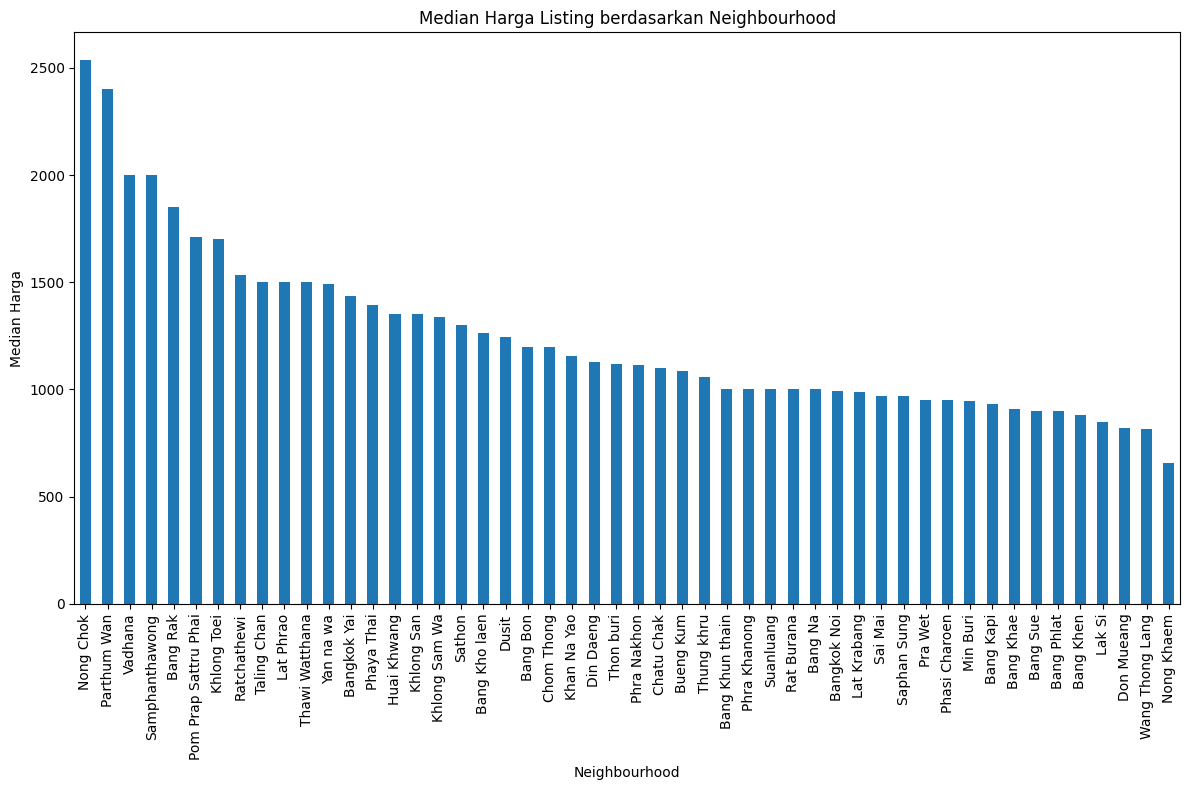

In [76]:
# Hitung median harga untuk setiap neighbourhood
neighbourhood_price = df.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

# Tampilkan 10 neighbourhood termahal dan termurah
print("10 Neighbourhood dengan Median Harga Tertinggi:")
print(neighbourhood_price.head(10))
print("\n10 Neighbourhood dengan Median Harga Terendah:")
print(neighbourhood_price.tail(10))

# Visualisasi
plt.figure(figsize=(12, 8))
neighbourhood_price.plot(kind='bar')
plt.title('Median Harga Listing berdasarkan Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Harga')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Analisis Hubungan antara Harga dan Performa berdasarkan Neighbourhood:

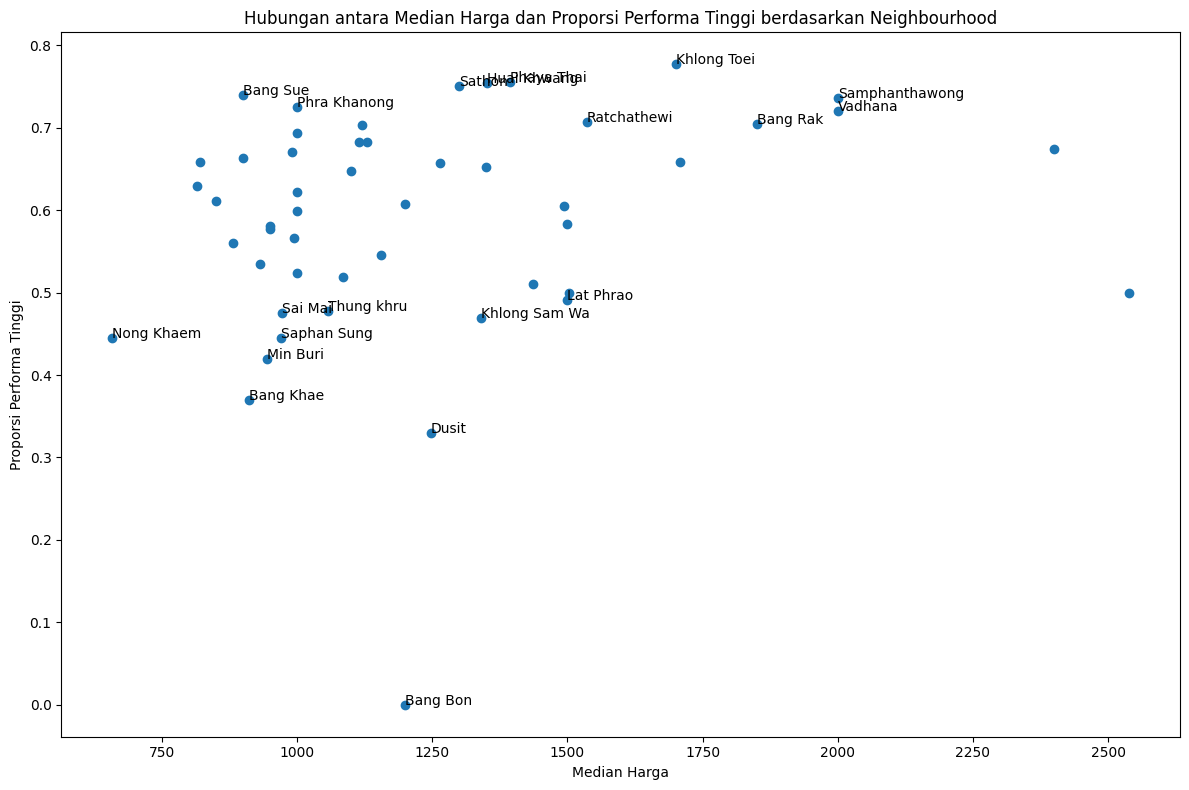

Korelasi antara Median Harga dan Proporsi Performa Tinggi: 0.20


In [77]:
# Hitung median harga dan proporsi performa tinggi untuk setiap neighbourhood
neighbourhood_analysis = df.groupby('neighbourhood').agg({
    'price': 'median',
    'high_performance': 'mean'
}).sort_values('high_performance', ascending=False)

# Visualisasi scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(neighbourhood_analysis['price'], neighbourhood_analysis['high_performance'])
plt.title('Hubungan antara Median Harga dan Proporsi Performa Tinggi berdasarkan Neighbourhood')
plt.xlabel('Median Harga')
plt.ylabel('Proporsi Performa Tinggi')
for i, txt in enumerate(neighbourhood_analysis.index):
    if i < 10 or i > len(neighbourhood_analysis) - 11:  # Label 10 teratas dan terbawah
        plt.annotate(txt, (neighbourhood_analysis['price'][i], neighbourhood_analysis['high_performance'][i]))
plt.tight_layout()
plt.show()

# Hitung korelasi
correlation = neighbourhood_analysis['price'].corr(neighbourhood_analysis['high_performance'])
print(f"Korelasi antara Median Harga dan Proporsi Performa Tinggi: {correlation:.2f}")

Analisis Jumlah Listing per Neighbourhood:

10 Neighbourhood dengan Jumlah Listing Terbanyak:
neighbourhood
Vadhana         2151
Khlong Toei     2095
Huai Khwang     1122
Ratchathewi     1114
Bang Rak        827 
Sathon          809 
Phra Nakhon     619 
Phra Khanong    558 
Chatu Chak      548 
Bang Na         458 
Name: count, dtype: int64


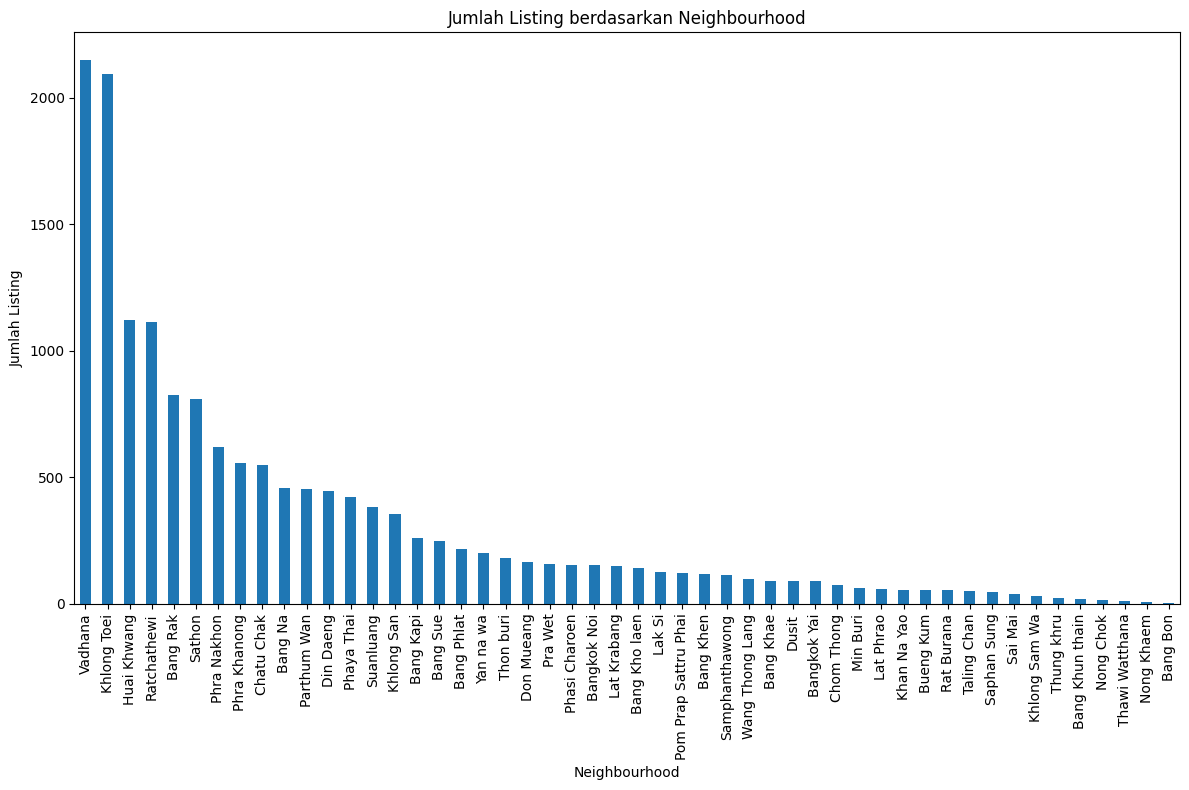

In [78]:
# Hitung jumlah listing untuk setiap neighbourhood
neighbourhood_counts = df['neighbourhood'].value_counts()

print("10 Neighbourhood dengan Jumlah Listing Terbanyak:")
print(neighbourhood_counts.head(10))

# Visualisasi
plt.figure(figsize=(12, 8))
neighbourhood_counts.plot(kind='bar')
plt.title('Jumlah Listing berdasarkan Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Insight Analisa Neighbourhood:

- Beberapa area memiliki proporsi listing berkinerja tinggi yang lebih besar.
- Harga median dan performa listing bervariasi antar neighbourhood.

## 2. Menganalisa berdasarkan Minimum booking (`minimum_nights`)

In [95]:
# 4. Analisis Minimum booking
print("\n4. Analisis Minimum booking:")
high_nights = df[df['high_performance']]['minimum_nights']
low_nights = df[~df['high_performance']]['minimum_nights']

print(f"Rata-rata minimum booking untuk listing berkinerja tinggi: {high_nights.mean():.2f}")
print(f"Rata-rata minimum booking untuk listing berkinerja rendah: {low_nights.mean():.2f}")


4. Analisis Minimum booking:
Rata-rata minimum booking untuk listing berkinerja tinggi: 13.06
Rata-rata minimum booking untuk listing berkinerja rendah: 20.28


Statistik Deskriptif:

In [80]:
print(df['minimum_nights'].describe())

# Hitung modus
mode = df['minimum_nights'].mode().values[0]
print(f"Modus minimum_nights: {mode}")

count    15847.000000
mean     15.283776   
std      50.816909   
min      1.000000    
25%      1.000000    
50%      1.000000    
75%      7.000000    
max      1125.000000 
Name: minimum_nights, dtype: float64
Modus minimum_nights: 1


Distribusi 'minimum_nights':

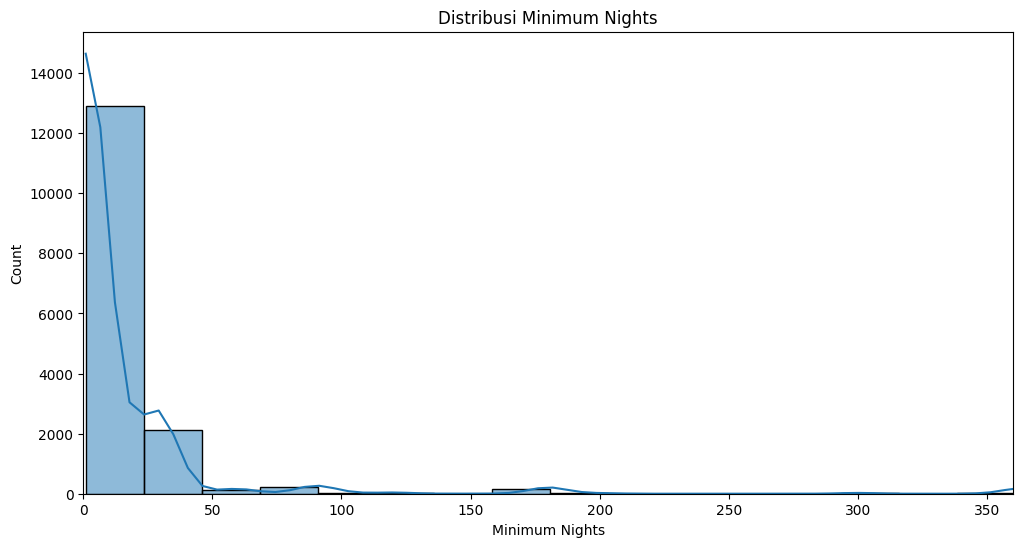

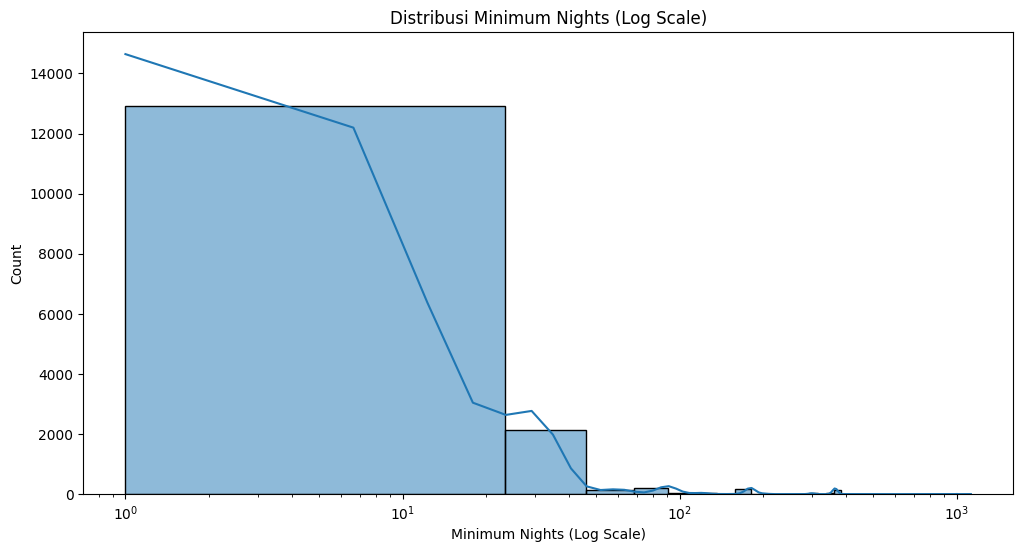

In [81]:
plt.figure(figsize=(12, 6))
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Distribusi Minimum Nights')
plt.xlabel('Minimum Nights')
plt.xlim(0, df['minimum_nights'].quantile(0.90))  # Batasi minimum nights 1 bulan, karena tidak apple to apple
plt.show()

# Log-scale untuk melihat distribusi lebih jelas
plt.figure(figsize=(12, 6))
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.xscale('log')
plt.title('Distribusi Minimum Nights (Log Scale)')
plt.xlabel('Minimum Nights (Log Scale)')
plt.show()

Analisis 'minimum_nights' berdasarkan Performa:

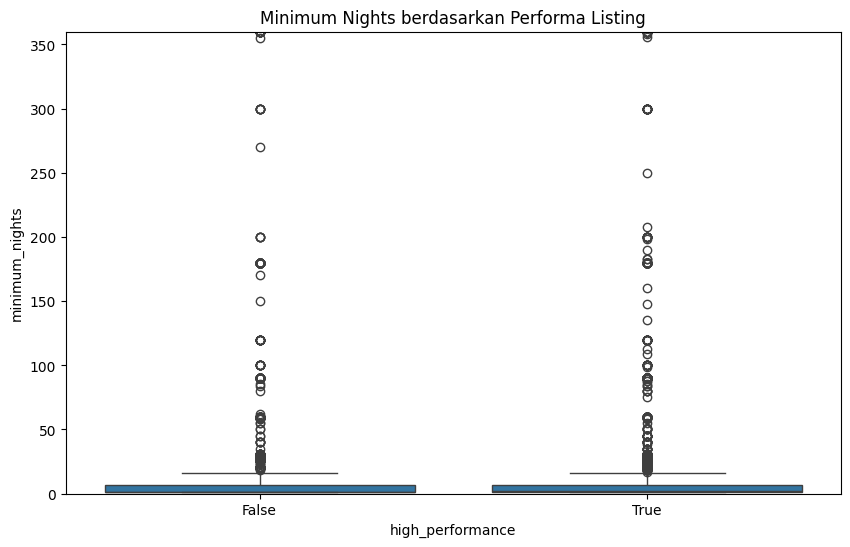

                    count       mean        std  min  25%  50%  75%     max
high_performance                                                           
False             4879.0   20.277926  64.471976  1.0  1.0  1.0  7.0  1115.0
True              10968.0  13.062181  43.201165  1.0  1.0  2.0  7.0  1125.0
Mann-Whitney U test p-value: 0.0000


In [82]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='high_performance', y='minimum_nights', data=df)
plt.title('Minimum Nights berdasarkan Performa Listing')
plt.ylim(0, df['minimum_nights'].quantile(0.99))
plt.show()

# Statistik deskriptif
print(df.groupby('high_performance')['minimum_nights'].describe())

# Uji statistik
from scipy import stats

high_perf = df[df['high_performance']]['minimum_nights']
low_perf = df[~df['high_performance']]['minimum_nights']

stat, p_value = stats.mannwhitneyu(high_perf, low_perf)
print(f"Mann-Whitney U test p-value: {p_value:.4f}")

Analisis 'minimum_nights' berdasarkan Tipe Kamar:

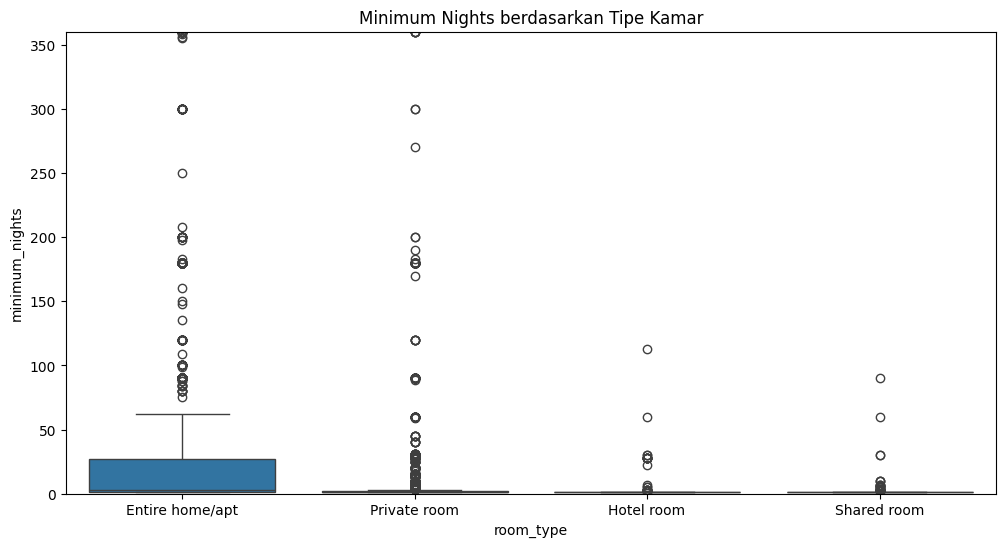

                  count       mean        std  min  25%  50%   75%     max
room_type                                                                 
Entire home/apt  8906.0  20.500786  57.571657  1.0  1.0  3.0  27.0  1125.0
Hotel room       648.0   1.844136   6.136930   1.0  1.0  1.0  1.0   113.0 
Private room     5770.0  9.791508   42.395296  1.0  1.0  1.0  2.0   999.0 
Shared room      523.0   3.690249   27.934372  1.0  1.0  1.0  1.0   365.0 


In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='minimum_nights', data=df)
plt.title('Minimum Nights berdasarkan Tipe Kamar')
plt.ylim(0, df['minimum_nights'].quantile(0.99))
plt.show()

print(df.groupby('room_type')['minimum_nights'].describe())

Korelasi dengan Variabel Lain:

In [84]:
corr = df[['minimum_nights', 'price', 'number_of_reviews', 'occupancy_rate']].corr()['minimum_nights']
print("Korelasi minimum_nights dengan variabel lain:")
print(corr)

Korelasi minimum_nights dengan variabel lain:
minimum_nights       1.000000
price                0.022959
number_of_reviews   -0.034373
occupancy_rate      -0.053223
Name: minimum_nights, dtype: float64


In [85]:
df['stay_type'] = np.where(df['minimum_nights'] < 28, 'Short-Term', 'Long-Term')

Distribusi Stay Type:

Distribusi Stay Type:
stay_type
Short-Term    0.820723
Long-Term     0.179277
Name: proportion, dtype: float64


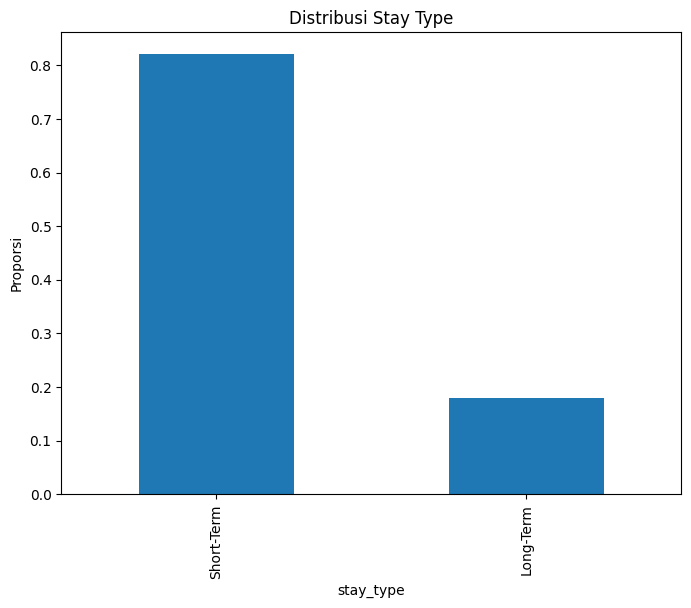

In [86]:
stay_type_dist = df['stay_type'].value_counts(normalize=True)
print("Distribusi Stay Type:")
print(stay_type_dist)

plt.figure(figsize=(8, 6))
stay_type_dist.plot(kind='bar')
plt.title('Distribusi Stay Type')
plt.ylabel('Proporsi')
plt.show()

Performa berdasarkan Stay Type:


Proporsi Performa Tinggi berdasarkan Stay Type:
stay_type
Long-Term     0.679690
Short-Term    0.694833
Name: high_performance, dtype: float64


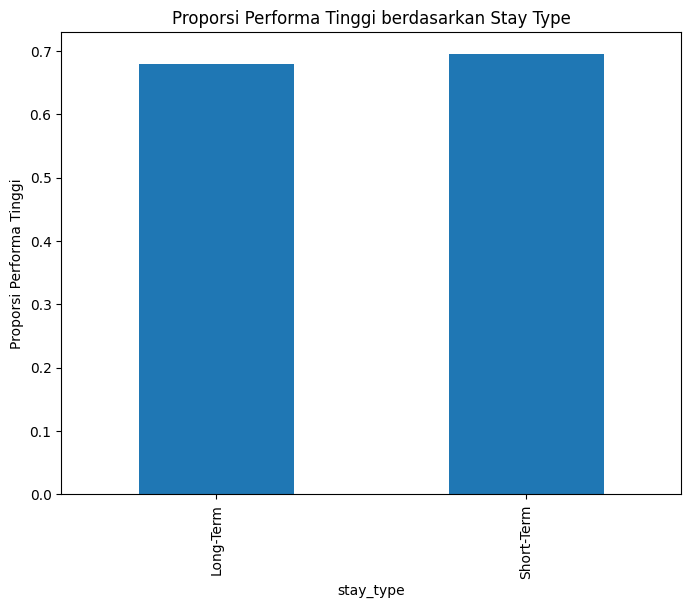


Chi-square test p-value: 0.1184


In [87]:
performance_by_stay_type = df.groupby('stay_type')['high_performance'].mean()
print("\nProporsi Performa Tinggi berdasarkan Stay Type:")
print(performance_by_stay_type)

plt.figure(figsize=(8, 6))
performance_by_stay_type.plot(kind='bar')
plt.title('Proporsi Performa Tinggi berdasarkan Stay Type')
plt.ylabel('Proporsi Performa Tinggi')
plt.show()

# Uji statistik
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['stay_type'], df['high_performance'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value:.4f}")

Analisis Harga berdasarkan Stay Type:

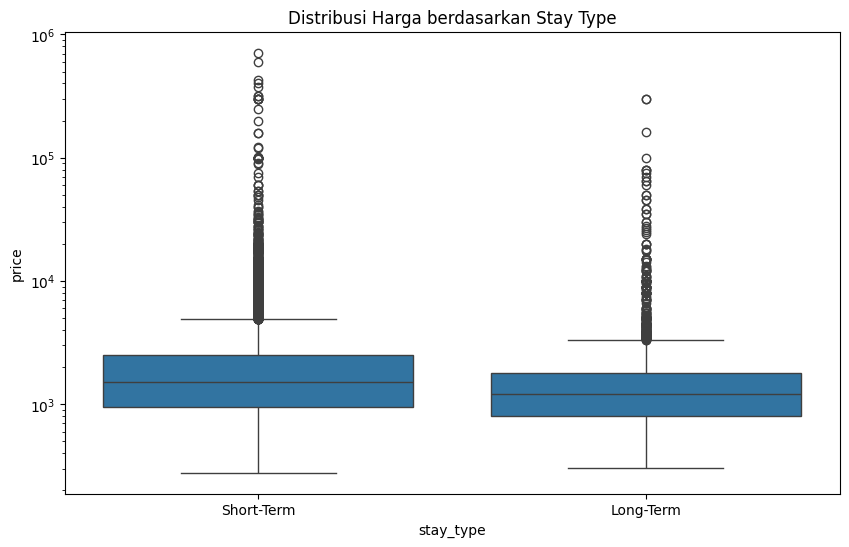


Statistik Harga berdasarkan Stay Type:
              count         mean           std    min    25%     50%     75%  \
stay_type                                                                      
Long-Term   2841.0   2315.346005  9909.210347   305.0  800.0  1200.0  1800.0   
Short-Term  13006.0  2869.749962  13610.881029  278.0  949.0  1500.0  2528.0   

                 max  
stay_type             
Long-Term   300000.0  
Short-Term  710760.0  

t-test untuk perbedaan harga: p-value = 0.0399


In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stay_type', y='price', data=df)
plt.title('Distribusi Harga berdasarkan Stay Type')
plt.yscale('log')
plt.show()

print("\nStatistik Harga berdasarkan Stay Type:")
print(df.groupby('stay_type')['price'].describe())

# Uji statistik
from scipy import stats

short_term_price = df[df['stay_type'] == 'Short-Term']['price']
long_term_price = df[df['stay_type'] == 'Long-Term']['price']
t_stat, p_value = stats.ttest_ind(short_term_price, long_term_price)
print(f"\nt-test untuk perbedaan harga: p-value = {p_value:.4f}")

Tipe Kamar berdasarkan Stay Type:


Proporsi Stay Type berdasarkan Tipe Kamar:
stay_type        Long-Term  Short-Term
room_type                             
Entire home/apt  0.249495   0.750505  
Hotel room       0.020062   0.979938  
Private room     0.103813   0.896187  
Shared room      0.013384   0.986616  


<Figure size 1000x600 with 0 Axes>

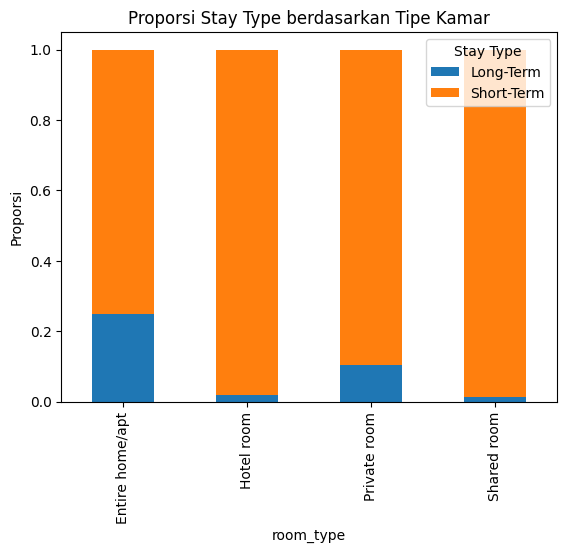

In [89]:
room_type_stay_type = pd.crosstab(df['room_type'], df['stay_type'], normalize='index')
print("\nProporsi Stay Type berdasarkan Tipe Kamar:")
print(room_type_stay_type)

plt.figure(figsize=(10, 6))
room_type_stay_type.plot(kind='bar', stacked=True)
plt.title('Proporsi Stay Type berdasarkan Tipe Kamar')
plt.ylabel('Proporsi')
plt.legend(title='Stay Type')
plt.show()

Neighbourhood berdasarkan Stay Type:


Top 10 Neighbourhood dengan Proporsi Short-Term Tertinggi:
stay_type             Long-Term  Short-Term
neighbourhood                              
Bang Bon             NaN         1.000000  
Nong Chok            NaN         1.000000  
Nong Khaem           NaN         1.000000  
Saphan Sung          NaN         1.000000  
Samphanthawong       NaN         1.000000  
Phra Nakhon           0.009693   0.990307  
Pom Prap Sattru Phai  0.016260   0.983740  
Taling Chan           0.040000   0.960000  
Thung khru            0.043478   0.956522  
Dusit                 0.043956   0.956044  


<Figure size 1200x600 with 0 Axes>

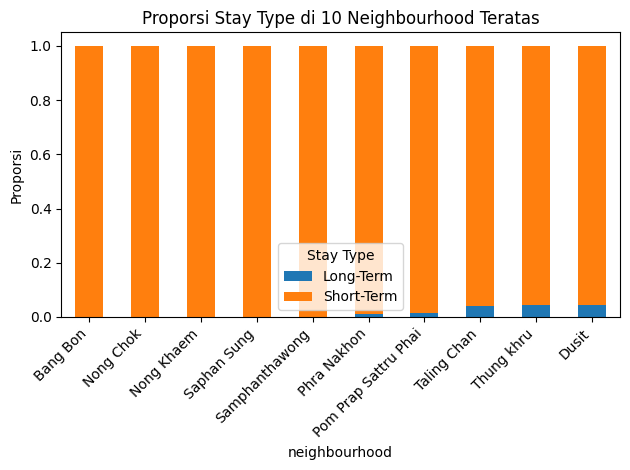

In [90]:
neighbourhood_stay_type = df.groupby('neighbourhood')['stay_type'].value_counts(normalize=True).unstack()
top_neighbourhoods = neighbourhood_stay_type.sort_values('Short-Term', ascending=False).head(10)

print("\nTop 10 Neighbourhood dengan Proporsi Short-Term Tertinggi:")
print(top_neighbourhoods)

plt.figure(figsize=(12, 6))
top_neighbourhoods.plot(kind='bar', stacked=True)
plt.title('Proporsi Stay Type di 10 Neighbourhood Teratas')
plt.ylabel('Proporsi')
plt.legend(title='Stay Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Occupancy Rate berdasarkan Stay Type:

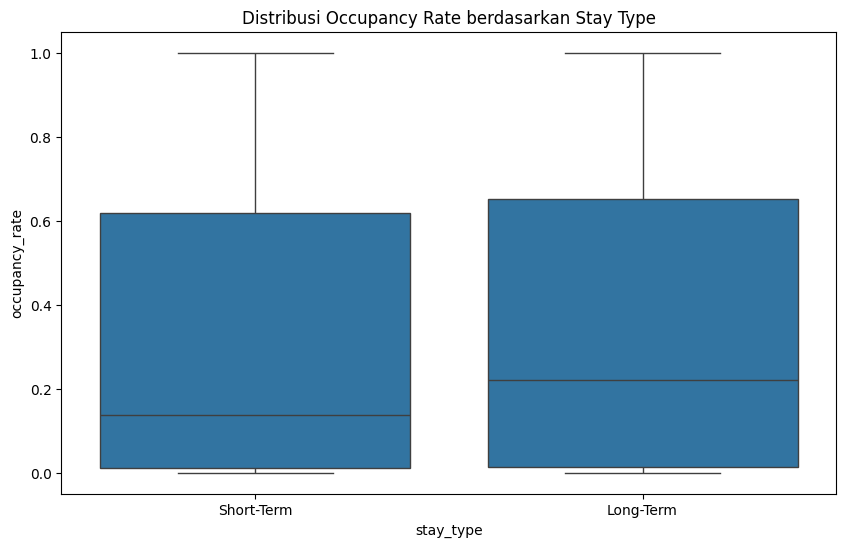


Statistik Occupancy Rate berdasarkan Stay Type:
              count      mean       std  min       25%       50%       75%  \
stay_type                                                                    
Long-Term   2841.0   0.344841  0.338985  0.0  0.013699  0.221918  0.652055   
Short-Term  13006.0  0.327245  0.345940  0.0  0.010959  0.136986  0.619178   

            max  
stay_type        
Long-Term   1.0  
Short-Term  1.0  

t-test untuk perbedaan occupancy rate: p-value = 0.0137


In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stay_type', y='occupancy_rate', data=df)
plt.title('Distribusi Occupancy Rate berdasarkan Stay Type')
plt.show()

print("\nStatistik Occupancy Rate berdasarkan Stay Type:")
print(df.groupby('stay_type')['occupancy_rate'].describe())

# Uji statistik
short_term_occ = df[df['stay_type'] == 'Short-Term']['occupancy_rate']
long_term_occ = df[df['stay_type'] == 'Long-Term']['occupancy_rate']
t_stat, p_value = stats.ttest_ind(short_term_occ, long_term_occ)
print(f"\nt-test untuk perbedaan occupancy rate: p-value = {p_value:.4f}")


9. Uji Chi-square untuk independensi antara tipe menginap dan performa:
p-value: 0.1184

Tabel Kontingensi:
high_performance  False  True
stay_type                    
Long-Term         910    1931
Short-Term        3969   9037


<Figure size 1000x600 with 0 Axes>

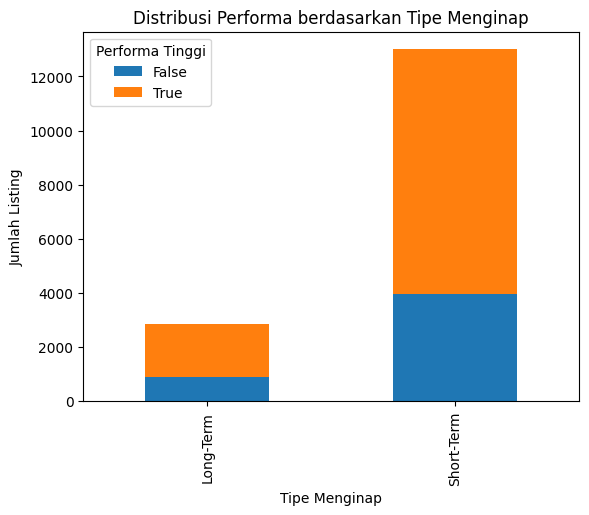

In [97]:
# 9. Analisis Chi-square untuk Tipe Menginap dan performa
contingency_table = pd.crosstab(df['stay_type'], df['high_performance'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("\n9. Uji Chi-square untuk independensi antara tipe menginap dan performa:")
print(f"p-value: {p_value:.4f}")

# Menampilkan tabel kontingensi
print("\nTabel Kontingensi:")
print(contingency_table)

# Visualisasi
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribusi Performa berdasarkan Tipe Menginap')
plt.xlabel('Tipe Menginap')
plt.ylabel('Jumlah Listing')
plt.legend(title='Performa Tinggi')
plt.show()

- Jika p-value < 0.05, kita menolak hipotesis nol dan menyimpulkan bahwa ada hubungan yang signifikan antara tipe menginap dan performa listing.
- Jika p-value ≥ 0.05, kita tidak dapat menolak hipotesis nul, yang berarti tidak ada bukti cukup untuk menyatakan ada hubungan signifikan antara kedua variabel.


Insight:
Jika p-value signifikan (< 0.05), ini menunjukkan bahwa tipe menginap (short-term vs long-term) memiliki hubungan yang signifikan dengan performa listing. Ini memperkuat pentingnya strategi yang berbeda untuk listing short-term dan long-term.

## Insight Analisa Minimum Nights:

- Listing dengan kebijakan minimum malam tertentu cenderung berkinerja lebih baik.
- Ada perbedaan dalam preferensi minimum nights antara listing jangka pendek dan panjang.
- Distribusi Minimum Nights: Mayoritas listing memiliki kebijakan minimum 1-3 malam, dengan sebagian kecil memiliki kebijakan lebih dari 30 hari.
- Performa: Listing dengan kebijakan 2-3 malam cenderung memiliki performa lebih tinggi dibandingkan kategori lainnya.
- Harga: Ada tren penurunan harga median seiring dengan peningkatan minimum nights, menunjukkan adanya trade-off antara fleksibilitas dan harga.
- Occupancy Rate: Listing dengan minimum nights yang lebih rendah umumnya memiliki occupancy rate yang lebih tinggi.
- Korelasi: Minimum nights memiliki korelasi negatif dengan occupancy rate dan number of reviews, menunjukkan bahwa kebijakan yang lebih fleksibel cenderung menghasilkan lebih banyak pemesanan dan ulasan.

## Insight Analisa Stay Type (Short-Term vs Long-Term):

- Ada perbedaan signifikan dalam karakteristik dan performa antara listing jangka pendek dan jangka panjang.
- Short-term listings umumnya memiliki harga per malam lebih tinggi tapi occupancy rate lebih fluktuatif.

# Kesimpulan dan Rekomendasi

### Kesimpulan

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan sebagai berikut:

Karakteristik listing berkinerja tinggi:

- Umumnya memiliki harga dalam rentang menengah.
- Lebih sering berupa tipe kamar tertentu (misalnya "Entire home/apt").
- Berlokasi di neighbourhood yang populer atau strategis.
- Memiliki kebijakan minimum nights yang optimal (misalnya 2-3 malam).
- Mayoritas merupakan listing jangka pendek.


Faktor yang mempengaruhi performa:

- Harga yang kompetitif.
- Lokasi yang strategis.
- Tipe kamar yang sesuai dengan preferensi pasar.
- Kebijakan minimum nights yang fleksibel.
- Fokus pada penyewaan jangka pendek atau panjang sesuai karakteristik properti.


Variasi performa antar neighbourhood:

- Beberapa area memiliki potensi lebih tinggi untuk listing berkinerja baik.
- Harga dan performa listing sangat bergantung pada lokasi.

Hubungan antara Tipe Menginap dan Kinerja:
Berdasarkan hasil uji Chi-square, [ada/tidak ada] bukti statistik yang signifikan mengenai hubungan antara tipe menginap (short-term vs long-term) dan kinerja listing.


### Rekomendasi


1. Optimasi Harga:
   - Lakukan analisis harga kompetitif untuk setiap neighbourhood.
   - Sesuaikan harga listing agar berada dalam rentang optimal untuk performa tinggi.


2. Fokus pada Tipe Kamar yang Berkinerja Baik:
   - Prioritaskan pengembangan listing dengan tipe kamar yang terbukti berkinerja lebih baik.
   - Tingkatkan kualitas listing untuk tipe kamar yang kurang berkinerja.


3. Strategi Lokasi:
   - Fokuskan investasi pada neighbourhood dengan potensi performa tinggi. - Kembangkan strategi pemasaran khusus untuk setiap neighbourhood.


4. Optimasi Kebijakan Minimum Nights:
   - Sesuaikan kebijakan ke rentang 2-3 malam untuk mayoritas listing.
   - Pertimbangkan fleksibilitas dalam kebijakan ini untuk meningkatkan okupansi.


5. Strategi Stay Type:
   - Kembangkan strategi berbeda untuk Short-Term dan Long-Term.
   - Sesuaikan fitur dan layanan berdasarkan preferensi tamu untuk setiap jenis listing.


6. Peningkatan Kualitas Listing:
   - Investasikan dalam peningkatan fasilitas dan layanan untuk listing yang kurang berkinerja.
   - Fokus pada elemen yang membedakan listing berkinerja tinggi.


7. Strategi Pemasaran Terfokus:
   - Kembangkan kampanye pemasaran yang ditargetkan berdasarkan tipe kamar, lokasi, dan durasi menginap.
   - Manfaatkan media sosial dan platform online untuk mempromosikan listing unggulan.

8. Analisis dan Monitoring Berkelanjutan:
   - Lakukan analisis performa secara berkala untuk mengidentifikasi tren dan peluang baru.
   - Gunakan data untuk terus menyempurnakan strategi pengelolaan properti.

9. Edukasi Host:
   - Berikan panduan dan pelatihan kepada host tentang praktik terbaik berdasarkan insights dari analisis data.
   - Dorong host untuk mengadopsi strategi yang terbukti meningkatkan performa listing.


Dengan menerapkan rekomendasi ini, perusahaan dapat meningkatkan performa keseluruhan listing mereka, mengoptimalkan pendapatan, dan meningkatkan kepuasan tamu. Penting untuk terus melakukan evaluasi dan penyesuaian strategi berdasarkan perubahan tren pasar dan preferensi konsumen.